# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 4. Нейронные сети.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds24_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image`;
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.





**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 60 баллов
* Задача 2 &mdash; 30 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash; 60 баллов


In [ ]:
# Bot check

# HW_ID: fpmi_ad4
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [ ]:
import numpy
import seaborn
import scipy.stats
import matplotlib.pyplot as matplt

seaborn.set_theme(font_scale=1.2, palette='Set2')
%matplotlib inline

Перед выполнением задания обязательно посмотрите <a href="https://miptstats.github.io/courses/ad_fivt/lecture4.pdf" target="_blank">презентацию</a> и <a href="https://miptstats.github.io/courses/ad_fivt/nn_simple_examples.html" target="_blank">обучающий ноутбук</a> с занятия по нейронным сетям.

---
### <font color="blue"><i>Легкая часть</i></font>

---
### Задача 1.

Рассмотрим двухслойную нейронную сеть, которая принимает на вход $x\in\mathbb{R}$ и возвращает $y\in\mathbb{R}$. Выход первого слоя возвращает $u \in\mathbb{R}^2$. После первого слоя используется функция активации $\sigma(x) = \frac{1}{1 + \exp(-x)}$, после второго слоя функция активации не используется (или используется тождественная). Тем самым нашу нейронную можно представить в виде

$$\widehat{y}(x) = \sum_{h=1}^2 w_{2h}u_h(x) + b_2,$$

$$u_h(x) = \sigma(w_{1h}x + b_{1h}),$$

$$\text{где} \; h \in \{1, 2\}.$$



**1.** Нарисуйте схематически данную нейронную сеть. Сколько у нее обучаемых параметров?

- Рисунок представлен ниже (файл `image.jpg`). Левый квадрат - входной слой, затем посередине - выходы первого слоя, после правее - второй слой и в самой правой стороне - выходной слой

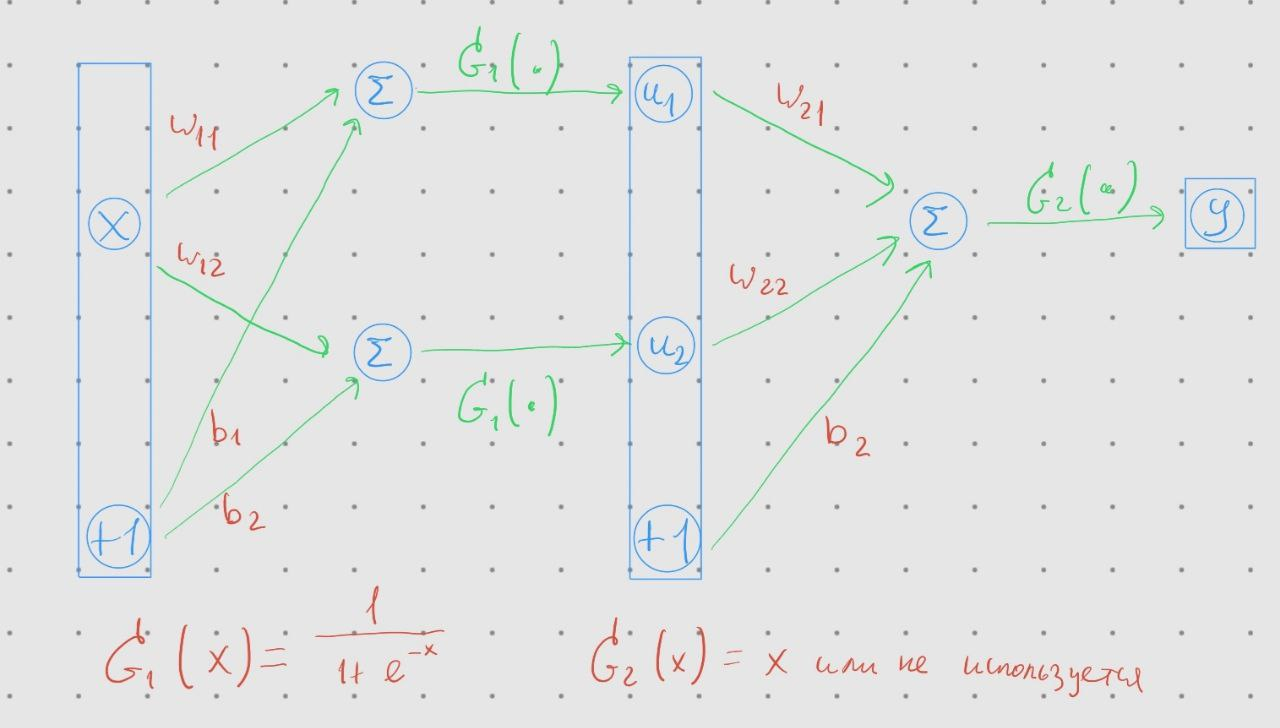

- 7 обучаемых параметров

  **2.** Пусть нам дана обучающая выборка $(X_1, Y_1), ..., (X_n, Y_n)$, где $X_i \in \mathbb{R}$ и $Y_i \in \mathbb{R}$. Нейронная сеть обучается по этой выборке, минимизируя заданную функцию $L$ &mdash; функцию ошибки. Положим, что $L$ &mdash; это MSE:
  $$\text{MSE} = L(X, Y) = \frac{1}{n}\sum_{i=1}^n \big(Y_i - \widehat{y}(X_i)\big)^2.$$

  Наша задача &mdash; найти оптимальные параметры нашей модели для минимизации $L(X, Y)$ на заданном наборе данных. Мы будем решать эту задачу с помощью градиентного спуска. Для этого нам понадобится выписать производные по всем параметрам сети. Конечно, в данном случае довольно просто выписать все производные напрямую. Однако мы воспользуемся следующей хитростью: мы будем считать производные поэтапно, причем начнем с конца вычислительной цепочки и, используя формулу производной сложной функции, последовательно посчитаем все необходимые производные. Этот процесс называется методом **обратного распространения ошибки (backpropagation)**.

**2.1.** Начнем с производной MSE по выходам сети
$$\frac{\partial\:\text{MSE}}{\partial \widehat{y}(X_i)} = -\frac{2}{n}\big(Y_i - \widehat{y}(X_i)\big)$$

**2.2** Возьмем производные выходов сети по параметрам последнего слоя

$$\frac{\partial \widehat{y}(X_i)}{\partial w_{2h}} = u_h(X_i)$$

$$\frac{\partial \widehat{y}(X_i)}{\partial b_2} = 1$$

Также выпишем производные выходов сети по входам последнего слоя

$$\frac{\partial \widehat{y}(X_i)}{\partial u_h(X_i)} = w_{2h}$$

Теперь выпишем производные MSE по параметрам и входам последнего слоя. Для этого вспомните правило производной сложной функции из математического анализа. Обратите внимание на то, что нам не нужно прописывать все производные до конца, достаточно заполнить пропуски в записи ниже:

$$\frac{\partial\:\text{MSE}}{\partial w_{2h}} = \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial \widehat{y}(X_i)} \frac{\partial \widehat{y}(X_i)}{\partial w_{2h}}$$

$$\frac{\partial\:\text{MSE}}{\partial b_2} = \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial \widehat{y}(X_i)} \frac{\partial \widehat{y}(X_i)}{\partial b_2}$$

$$\frac{\partial\:\text{MSE}}{\partial u_h} = \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial \widehat{y}(X_i)} \frac{\partial \widehat{y}(X_i)}{\partial u_h}$$

**2.2.** Теперь будем разбираться с производными по параметрам первого слоя.

Для начала нам пригодится производная функции активации, запишите ее так, чтобы ответе осталась функция от $\sigma(x)$

$$\frac{\partial\:\sigma(x)}{\partial x} = \frac{exp(-x)}{(1 + exp(-x))^2} = \sigma(x) \cdot (1 - \sigma(x))$$

Теперь возьмем производные выходов первого слоя по его параметрам. Пусть $f_h(X_i) = w_{1h}X_i + b_{1h}$

$$\frac{\partial u_h(X_i)}{\partial w_{1h}} = \frac{\partial u_h(f_h(X_i))}{\partial f_h} \cdot \frac{\partial f_h(X_i)}{\partial w_{1h}} = \frac{\partial \sigma(f_h(X_i))}{\partial f_h} \cdot X_i = \sigma(f(X_i)) \cdot (1 - \sigma(f(X_i))) \cdot X_i$$

$$\frac{\partial u_h(X_i)}{\partial b_{1h}} = \frac{\partial u_h(f_h(X_i))}{\partial f_h} \cdot \frac{\partial f_h(X_i)}{\partial b_{1h}} = \frac{\partial \sigma(f_h(X_i))}{\partial f_h} = \sigma(f(X_i)) \cdot (1 - \sigma(f(X_i)))$$

Наконец, выпишем производные MSE по параметрам первого слоя. Так же как и раньше достаточно заполнить пропуски в записи ниже

$$\frac{\partial\:\text{MSE}}{\partial w_{1h}} = \; \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial u_h(X_i)} \frac{\partial u_h(X_i)}{\partial w_{1h}}$$

$$\frac{\partial\:\text{MSE}}{\partial b_{1h}} = \; \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial u_h(X_i)} \frac{\partial u_h(X_i)}{\partial b_{1h}}$$

**3.** Пусть обучающая выборка очень большая. Что нужно делать в таком случае? Запишите, как нужно поменять правило обновления параметров.
- Будем использовать стохастический градиентный спуск, так как таким образом мы сможем считать градиенты не по всей выборке. Весто полного вычисления суммы на каждой итерации оценим ее по небольшому количеству слагаемых и сделаем шаг. То есть, берется произвольный набор индексов (батч) $I = \{i_1,..., i_k\}\colon \forall j \colon i_j \in [1,...,n]$, где `k` фиксируется заранее - количество рассматриваемых индексов. Если позволяют ресурсы, лучше перемешивать на каждой итерации индексы, то есть, брать новое случайное `I` (на каждом шаге каждый индекс выбирать незамисимо, то есть, могут быть повторения внутри одного батча). Если ресурсы не позволяют, можно выбирать последовательо блоки по `k` индексов так, чтобы каждый участвовал одинаковое число раз: например, на первом шаге первые `k`, на втором - от `k` до `2k - 1` и так далее. $\widehat{y}_t(X_i)$ - значения `y`, полученные через параметры сети $\theta_t$. $\eta$ - скорость обучения. Тогда:
  $$\theta_{t+1} = \theta_t - \eta \cdot \frac{1}{k} \cdot \nabla \big(\sum_{i \in I}\big(Y_i - \widehat{y}(X_i)\big)^2\big)$$

**Вывод:**
- Подсчет всех производных и вычисление оптимизируемой функции работает за линейное время от размера входа
- В силу удобного вида производной функции активации обратный проход будет происходить тоже за линейное время, что довольно быстро
- На больших данных стоит использовать стохастический градиентный спуск для ускорения тренировочного процесса, так как все данные полностью будут обрабатываться очень долго

---
### Задача 2.

Напишите нейронную сеть из задачи 1 с помощью библиотеки `pytorch`, используя Sequential-стиль. Перед выполнением задачи рекомендуется посмотреть <a href="https://miptstats.github.io/courses/ad_fivt/nn_simple_examples.html#3.-Готовые-модули-из-PyTorch" target="_blank">ноутбук</a> с занятия. Функция активации реализована как `torch.nn.Sigmoid`.

*Внимание.* Для выполнения задачи потребуется установить библиотеку `pytorch`. Альтернативный вариант &mdash; выполнение в <a href="https://colab.research.google.com" target="_blank">Google Colab</a>. Учитывайте, что при длительном бездействии Colab может сам завершить работу ядра.

- Для начала импортируем необходимое

In [3]:
import time
import torch
from torch import nn

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from IPython.display import clear_output

- Теперь создадим нейронную сеть. Первая функция - линейная с 1 входом и 2 выходами, вторая - сигмоида, третья - линейная с 2 входами и 2 выходом

In [4]:
# Собираем модули в последовательность
model = nn.Sequential(
  nn.Linear(in_features=1, out_features=2),  #  Кол-во признаков во входном слое 1, в выходном 2
  nn.Sigmoid(),                              #  Функция активации, у нас сигмоида
  nn.Linear(in_features=2, out_features=1)   #  Кол-во признаков во входном слое 2, в выходном 1
)

- Изначальные коэффициенты - случайные числа:

In [5]:
for name, param in model.named_parameters():
    print(name)
    print(param.data)

0.weight
tensor([[-0.5573],
        [-0.7560]])
0.bias
tensor([0.4973, 0.0484])
2.weight
tensor([[0.3511, 0.2470]])
2.bias
tensor([0.4191])


Сгенерируем данные. Возьмите какую-либо нелинейную функцию $y(x)$.

- Возьмем следующую нелинейную функцию

In [6]:
def func(X):
  return (torch.sin(2.5 * (X - 0.75)) + 2.5 * (X - 0.75)) * 10

- Сгенерируем данные и разделим их на тренировочную и тестовую выборки

In [7]:
sample_size = int(1e5)
X = torch.FloatTensor(scipy.stats.norm.rvs(size=(sample_size, 1)))

X_train, X_test = train_test_split(X, test_size=0.2)
Y_train, Y_test = func(X_train), func(X_test)

Обучите нейросеть на этих данных. Используйте код с занятия.

- Определим функцию, обучающую созданную нейросеть

In [8]:
def model_train(model, X, Y, max_iter=10000, low_loss=None):
  '''
  Обучение модели pytorch
  
  X -- numpy-матрица объект-признак 
  Y -- numpy-вектор значений целевого признака
  max_iter -- максимальное количество итераций
  low_loss -- значение ошибки, для которого считаем, что обучение закончено
  '''
  # Устанавливаю скорость обучения
  optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

  for i in range(max_iter):
      # Получаем предсказания модели
      predictions = model(X)

      # Вычисляем оптимизируемум функцию (MSE) по предсказаниям
      loss = nn.MSELoss()(predictions, Y)

      # Вычисляем градиенты оптимизируемой функции по всем параметрам модели
      loss.backward()

      # Обновляем параметры по формулам соответствующего метода оптимизации, используются вычисленные ранее градиенты
      optimizer.step()

      # Зануляем градиенты
      optimizer.zero_grad()
      
      if low_loss is not None and loss.item() < low_loss:
          break

- Теперь обучим ее

In [9]:
print("Время тренировки:")

start_time = time.time()
model_train(model, X_train, Y_train, max_iter=10000, low_loss=2.5)
print("  PyTorch нейросеть: %s seconds" % (time.time() - start_time))

Время тренировки:
  PyTorch нейросеть: 6.632606506347656 seconds


Визуализируйте предсказания и посчитайте MSE на тестовой части данных.

- Определим функцию, котоаря будет строить график с точками двух типов: исходной функции и предсказания нейросети

In [10]:
def plot_result(X, Y, predictions, title, legend):
    '''
    Визуализация результата обучения.

    X, Y -- объекты и таргеты обучающей выборки;
    predictions -- предсказания модели;
    title -- заголовок графика
    '''
    colors = ["#e60049", "#0bb4ff", "#50e991", "#e6d800", "#9b19f5", "#ffa300", "#dc0ab4", "#b3d4ff", "#00bfa0"]
    
    matplt.figure(figsize=(16, 9))
    matplt.scatter(X, Y)
    for i, prediction in enumerate(predictions):
       matplt.scatter(X, prediction, color=colors[i + 3])
    matplt.xlabel("Значение переменной x")
    matplt.ylabel("Значение функции")
    matplt.title(title)
    matplt.legend(legend, title="Тип функции")
    matplt.show()

- Посчитаем предсказания и построим график

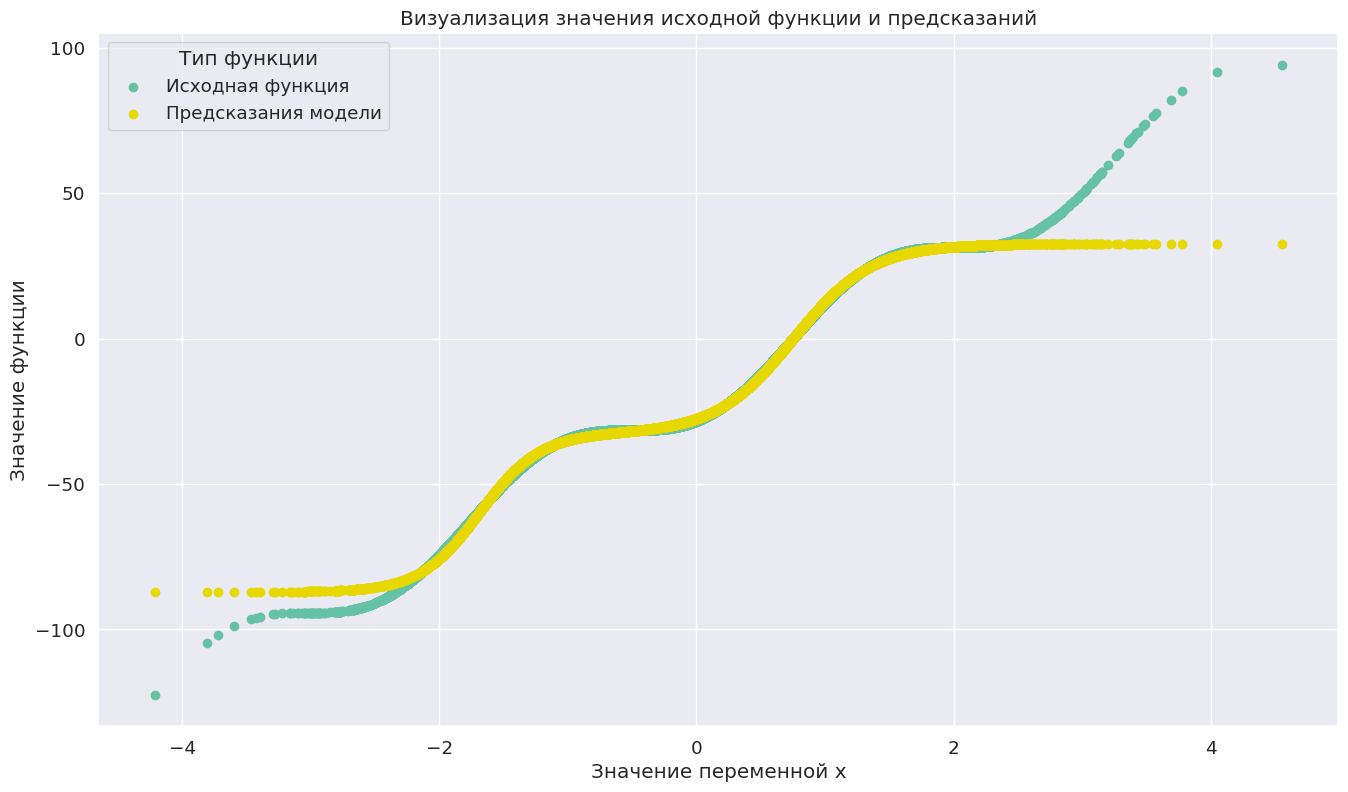

In [11]:
title = "Визуализация значения исходной функции и предсказаний"
plot_result(X_test.numpy(), Y_test.numpy(), [model(X_test).detach()], title, ["Исходная функция", "Предсказания модели"])

- Теперь посчитаем ошибку

In [12]:
print(f"MSE = {nn.MSELoss()(model(X_test), Y_test):.3f}")

MSE = 3.236


**Вывод:**
- Наша нейронная сеть может апроксимировать функцию с 2 перегибами, так как в ней складываются две сигмоиды от двух нейронов, которые в сумме могут давать ступеньку посередине, что мы и видим на графике
- Опционально на оба нейрона могут получиться одинаковые коэффициенты, в таком случае ступеньки не будет и апроксимация окажется схожей с обычной сигмоидой
- Более сложные функции и зависимости данной нейросетью апроксимировать не получится в силу недостатка в ней нейронов. Например, если бы их было больше, то моя выбранная нелинейная функция могла бы быть апроксимирована с большей точностью для продолжения в оба конца: влево и вправо по оси `x`, так как мы смогли бы увеличить число разрешенных перегибов и `ступенек`
- Апроксимирование зависит от того, какие мы исходные параметры модели зададим (начальные коэффициенты, скорость обучения): в некоторых случаях нейросеть может банально не обучиться и `MSE` будет `NaN`, то есть, слишком большим
- Нейросеть может начинать переобучаться в какой-то момент: нельзя делать слишком много итераций или требовать слишком маленькое значение метрици ошибки. Да и, в принципе это бессмысленно, так как с определенного шага метрика меняется незначительно

---
### <font color="orange"><i>Сложная часть</i></font>

---
### Задача 3.

Теперь реализуйте класс нейронной сети из задачи 1 в стиле scikit-learn, например, см. <a href="https://miptstats.github.io/courses/ad_fivt/task3.html#Задача-4." target="_blank">шаблон класса задачи 4 из задания 3</a>. Предусмотрите возможность обучения по случайным батчам. При реализации можно использовать только библиотеку `numpy`.

- Принцип работы был описан в ноутбуке про `pytorch`. Производные для обратного прохода были посчитаны выше в первой части, осталось только лишь подставить, переписав в матричном виде (сумма - это скалярное произведение, то есть домножение столбца на транспонированный столбец, домножение значений слоя на веса - умножение транспонированного столбца на матрицу)

In [13]:
class NeuralNetwork:
  def __init__(self, input_size, hidden_size, output_size):
    '''
    Инициализация модели.
    
    Аргументы:
    input_size -- количество входных параметров
    hidden_size -- количество скрытых нейронов
    output_size -- количество выходных параметров
    ''' 
    self.input_size  = input_size
    self.hidden_size = hidden_size
    self.output_size = output_size
    
    # Инициализация весов
    self.W1 = numpy.random.randn(self.input_size,  self.hidden_size)
    self.W2 = numpy.random.randn(self.hidden_size, self.output_size)
    self.B1 = numpy.zeros((1, self.hidden_size))
    self.B2 = numpy.zeros((1, self.output_size))
      
      
  def fit(self, X, Y, max_iter=100000, rate=0.01, batch_random=True, batch_size=128, low_loss=None):
    '''
    Обучение модели.
    
    Аргументы:
    X -- numpy-матрица объект-признак размера (n, input_size);
    Y -- numpy-вектор значений целевого признака размера (n, output_size).
    max_iter -- максимальное количество итераций
    rate -- шаг градиентного спуска
    batch_random -- True - обучение не случайных батчах, False - последовательных
    batch_size -- размер батча (None -- обучение на всем наборе данных)
    low_loss -- значение ошибки, для которого считаем, что обучение закончено
    '''
    start_index = 0
    for epoch in range(max_iter):
      # Создаем батчи, если требуется используем случайную перестановку индексов
      batch_size = X.shape[0] if batch_size is None else batch_size
      indices = numpy.random.permutation(X.shape[0]) if batch_random else numpy.arange(X.shape[0])
      
      for i in range(0, X.shape[0], batch_size):
        # Делаем прямое и обратное распространение, затем обновляем параметры
        self._backward(Y[indices][i:i+batch_size], self._forward(X[indices][i:i+batch_size]))
        self._update_param(X[indices][i:i+batch_size], rate, batch_size)

      loss = numpy.mean(numpy.square(Y - self._forward(X)))
      if low_loss is not None and loss < low_loss:
        break
  
  
  def predict(self, X):
    '''
    Вычисление предсказаний.
    
    Аргументы:
    X -- numpy-матрица объект-признак размера (n, 1);
    
    Возвращает:
    predictions -- предсказания в виде numpy-вектора размера (n, 1).
    '''
    return self._forward(X)


  def _sigmoid(self, X):
    '''
    Возвращает сигмоиду от аргумента x
    '''
    return 1 / (1 + numpy.exp(-X))
  
  
  def _sigmoid_derivative(self, X):
    '''
    Возвращает производную сигмоиды от аргумента x
    '''
    return X * (1 - X)
  
  
  def _forward(self, X):
    '''
    Совершает прямой проход в процессе обучения
    '''
    self.U = self._sigmoid(X @ self.W1 + self.B1)
    return self.U @ self.W2 + self.B2
  
  
  def _backward(self, Y, output):
    '''
    Совершает обратный проход в процессе обучения
    '''
    self.output_delta = Y - output
    self.hidden_delta = self.output_delta @ self.W2.T * self._sigmoid_derivative(self.U)
  
  
  def _update_param(self, X, learning_rate, batch_size):
    '''
    Обновляет параметры сети при помощи уже посчитанных градиентов
    '''
    self.W2 += learning_rate / batch_size * self.U.T @ self.output_delta
    self.W1 += learning_rate / batch_size * X.T      @ self.hidden_delta
    self.B2 += learning_rate / batch_size * numpy.sum(self.output_delta, axis=0, keepdims=True)
    self.B1 += learning_rate / batch_size * numpy.sum(self.hidden_delta, axis=0, keepdims=True)

Обучите нейронную сеть на рассмотренных ранее данных, а также простую линейную регрессию. Для линейной регрессии стоит взять реализацию из `sklearn`. Сравните эту нейросеть, линейную регрессию и pytorch-сеть из задачи 2.

In [14]:
# Создание и обучение нейронной сети
network = NeuralNetwork(input_size=1, hidden_size=2, output_size=1)

print("Время тренировки:")

start_time = time.time()
network.fit(X_train.numpy(), Y_train.numpy(), low_loss=2.5)
print("  Рукописная нейросеть: %s seconds" % (time.time() - start_time))

# Создание и обучение линейной регрессии
regression = LinearRegression(fit_intercept=True)
start_time = time.time()
regression.fit(X_train.numpy(), Y_train.numpy())
print("  Линейная регрессия: %s seconds" % (time.time() - start_time))

Время тренировки:
  Рукописная нейросеть: 5.2018702030181885 seconds
  Линейная регрессия: 0.0021944046020507812 seconds


Визуализируйте предсказания данных моделей и посчитайте MSE на тестовой части данных.

- Посчитаем предсказания и построим график для рукописной нейросети и для линейной регрессии

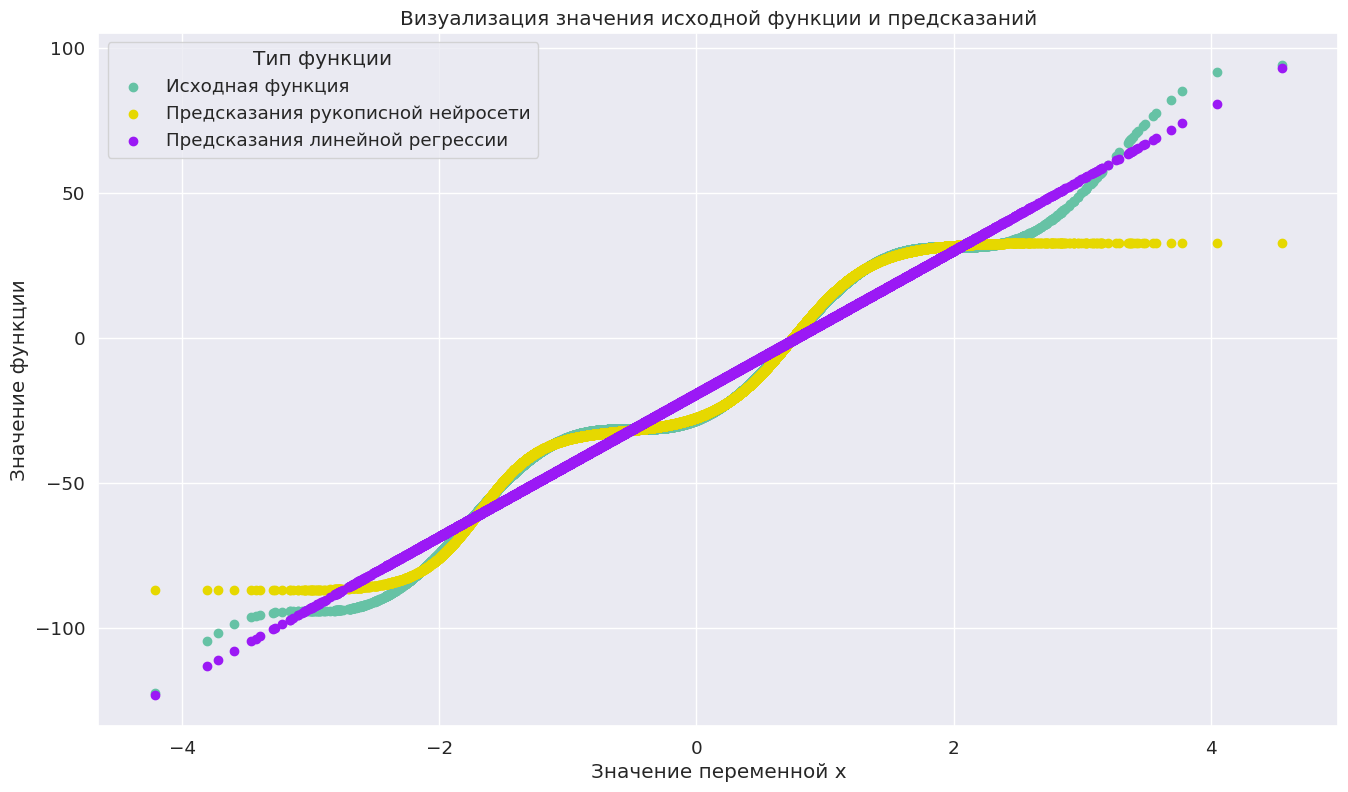

In [15]:
legend_f = ["Исходная функция", "Предсказания рукописной нейросети", "Предсказания линейной регрессии"]
plot_result(X_test.numpy(), Y_test.numpy(), [network.predict(X_test), regression.predict(X_test)], title, legend_f)

- Теперь для них посчитаем ошибку

In [16]:
print(f"Рукописная нейросеть: MSE = {metrics.mean_squared_error(network.predict(X_test), Y_test):.3f}")
print(f"Линейная регрессия:   MSE = {metrics.mean_squared_error(regression.predict(X_test), Y_test):.3f}")

Рукописная нейросеть: MSE = 3.204
Линейная регрессия:   MSE = 49.398


- При примерно одинаковом времени работы (рукописная получается чуть быстрее, чем от PyTorch) мы получаем чуть меньшую ошибку на рукописной нейронной сети. Это может быть по причине того, что мы поделили данные на батчи и при тренировке все вычисления проводим с маленькими матрицами, что немного ускоряет процесс обучения. Так же наша нейросеть работает исключительно с одним скрытым слоем, в то время как сеть от `pytorch` может поддерживать при необходимости произвольное число слоев. Так или иначе, разница практически неощутима по обоим параметрам времени и точности. Но, тем не менее, вывод: делить на батчи выгодно
- Линейная регрессия работает очень быстро в силу своей простоты, но сильно хуже по точности, чем использованные ранее модели нейросетей, так как она предназначена для предсказания именно линейных функций, а наша заведомо была выбрана не такой. При этом мы видим на графике, что предсказания лежат вдоль оси симметрии, там, где метрика ошибки будет минимальна с точки зрения отклонений

Повторите вычисления для другой нелинейной функции $y(x)$.

- Объявим новую нелинейную функцию:

In [17]:
def func_2(X):
  return X * X + 3 * X + 2

- Сгенерируем данные и разделим их на тренировочную и тестовую выборки

In [18]:
sample_size = int(1e5)
X_2 = torch.FloatTensor(scipy.stats.norm.rvs(size=(sample_size, 1)))

X_train_2, X_test_2 = train_test_split(X_2, test_size=0.2)
Y_train_2, Y_test_2 = func_2(X_train_2), func_2(X_test_2)

- Cоздадим нейронную сеть `pytorch`. Первая функция - линейная с 1 входом и 2 выходами, вторая - сигмоида, третья - линейная с 2 входами и 2 выходом
- Создадим рукописную нейронную сеть
- Создадим модель линейной регрессии
- Сразу же обучим их

In [19]:
print("Время тренировки:")

# Собираем модули в последовательность
model_2 = nn.Sequential(
  nn.Linear(in_features=1, out_features=2),  #  Кол-во признаков во входном слое 1, в выходном 2
  nn.Sigmoid(),                              #  Функция активации, у нас сигмоида
  nn.Linear(in_features=2, out_features=1)   #  Кол-во признаков во входном слое 2, в выходном 1
)
start_time = time.time()
model_train(model_2, X_train_2, Y_train_2, low_loss=0.10)
print("  PyTorch нейросеть: %s seconds" % (time.time() - start_time))

# Создание и обучение нейронной сети
network_2 = NeuralNetwork(input_size=1, hidden_size=2, output_size=1)
start_time = time.time()
network_2.fit(X_train_2.numpy(), Y_train_2.numpy(), low_loss=0.10)
print("  Рукописная нейросеть: %s seconds" % (time.time() - start_time))

# Создание и обучение линейной регрессии
regression_2 = LinearRegression(fit_intercept=True)
start_time = time.time()
regression_2.fit(X_train_2.numpy(), Y_train_2.numpy())
print("  Линейная регрессия: %s seconds" % (time.time() - start_time))

Время тренировки:
  PyTorch нейросеть: 9.86965274810791 seconds
  Рукописная нейросеть: 9.275453805923462 seconds
  Линейная регрессия: 0.00177764892578125 seconds


- Посчитаем предсказания и построим график для нейросети `pytorch`, рукописной нейросети и для линейной регрессии

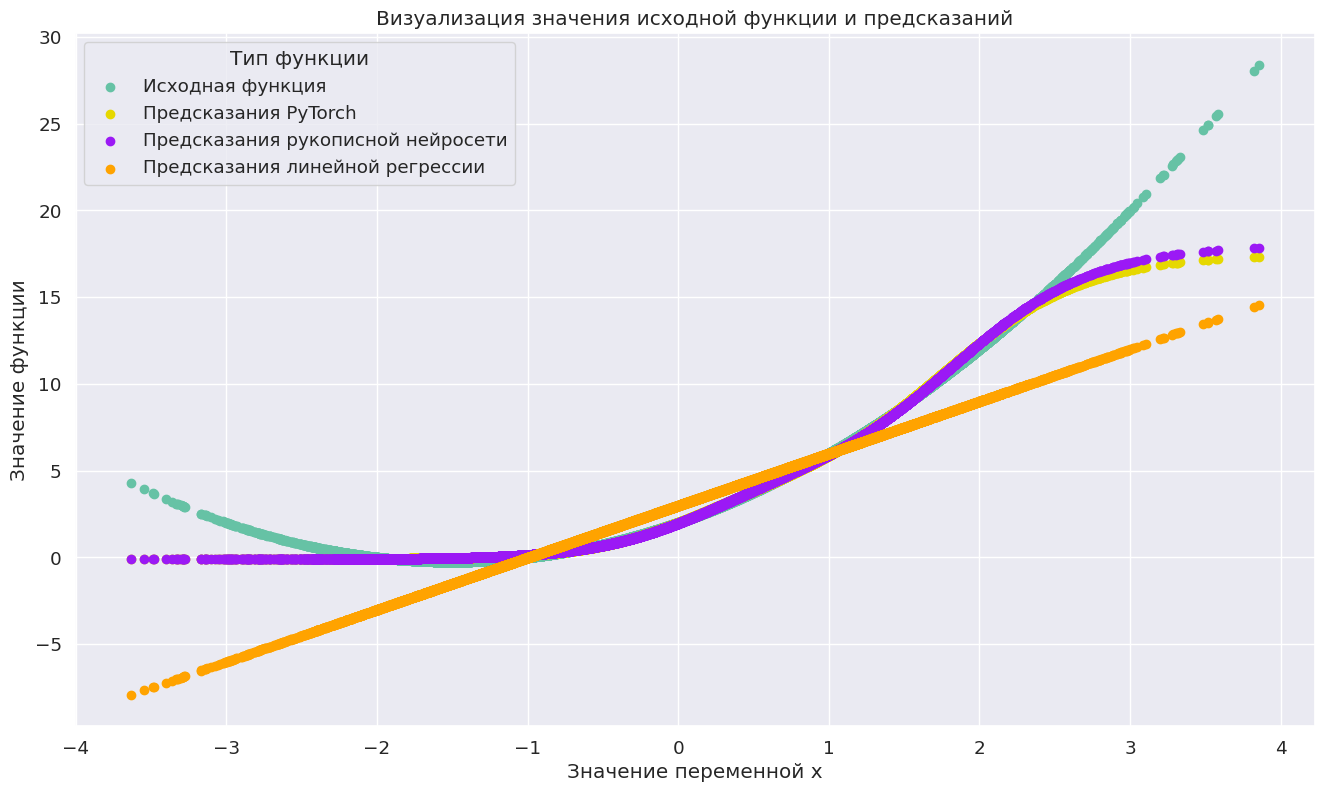

In [20]:
legend_g = ["Исходная функция", "Предсказания PyTorch", "Предсказания рукописной нейросети", "Предсказания линейной регрессии"]
plot_result(X_test_2.numpy(), Y_test_2.numpy(), [model_2(X_test_2).detach(), network_2.predict(X_test_2), regression_2.predict(X_test_2)], title, legend_g)

- Теперь для них посчитаем ошибку

In [21]:
print(f"PyTorch нейросеть:    MSE = {nn.MSELoss()(model_2(X_test_2), Y_test_2):.4f}")
print(f"Рукописная нейросеть: MSE = {metrics.mean_squared_error(network_2.predict(X_test_2), Y_test_2):.4f}")
print(f"Линейная регрессия:   MSE = {metrics.mean_squared_error(regression_2.predict(X_test_2), Y_test_2):.4f}")

PyTorch нейросеть:    MSE = 0.1014
Рукописная нейросеть: MSE = 0.0894
Линейная регрессия:   MSE = 1.9700


**Вывод:**
- Все выводы из прошлой части были подтверждены снова: рукописная нейросеть неощутимо быстрее PyTorch при чуть лучших результатах точности, а линейная регрессия не может справиться с задачей в силу того, что функция таковой не является, даже несмотря на то, что теперь была взята без ступенек или перегибов
- Далеко не все функции могут быть приближены нейросетью с 2 нейронами: да, кусочно это возможно, как мы видим из графика, предсказания и реальные значения для нейросетей практически совпадают, но на краях все равно расходятся в силу невозможности приближения (нехватка нейронов в скрытом слое). При этом, если приближение возможно, то мы можем за малое время с помощью градиентного спуска добиться очень хорошей точности